In [ ]:
from glob import glob
import os
import mne
import numpy as np
import pandas
import matplotlib as plt
import sklearn

Testing on a sample

Reading D:\semester 8 bachelor\data\sub-014\eeg\sub-014_task-Rest_run-01_eeg.fdt
Reading 0 ... 250699  =      0.000 ...   501.398 secs...
Opening raw-browser...


C:\Users\dell\AppData\Local\Temp\ipykernel_2132\2797019915.py:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab('D:\semester 8 bachelor\data\sub-014\eeg\sub-014_task-Rest_run-01_eeg.set',preload=True)


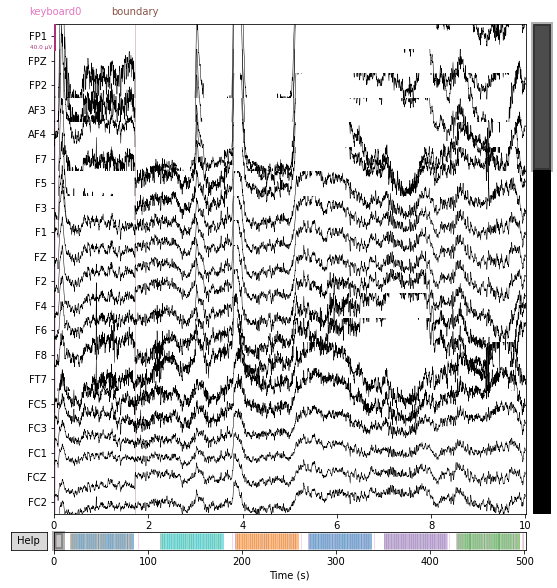

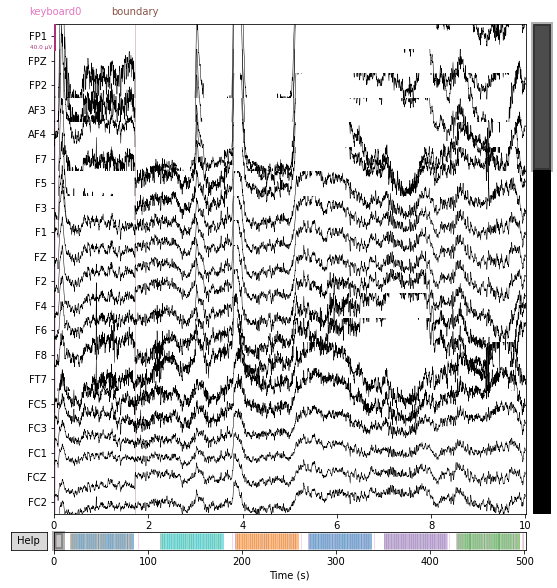

In [ ]:

raw = mne.io.read_raw_eeglab('D:\semester 8 bachelor\data\sub-014\eeg\sub-014_task-Rest_run-01_eeg.set',preload=True)
raw.plot()


In [ ]:

ica=mne.preprocessing.ICA(random_state=20)
ica.fit(raw.copy())


Fitting ICA to data using 66 channels (please be patient, this may take a while)


C:\Users\dell\AppData\Local\Temp\ipykernel_2132\503630035.py:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw.copy())


Selecting by non-zero PCA components: 66 components
Fitting ICA took 87.4s.


Method,fastica
Fit,98 iterations on raw data (250700 samples)
ICA components,66
Explained variance,100.0 %
Available PCA components,66
Channel types,eeg
ICA components marked for exclusion,—


In [ ]:
print(len(raw.ch_names))
channels=raw.ch_names
print(channels)
if 'EKG' in channels:
    raw=raw.drop_channels(['EKG'])
print(raw.ch_names)
print(raw.plot)

67
['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'M1', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'M2', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2', 'HEOG', 'VEOG', 'EKG']
['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'M1', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'M2', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2', 'HEOG', 'VEOG']
<bound method BaseRaw.plot of <RawEEGLAB | sub-014_task-Rest_run-01_eeg.fdt, 66 x 250700 (501.4 s), ~126.3 MB, data loaded>>

In [ ]:
raw.set_channel_types({'HEOG': 'eog', 'VEOG': 'eog'})
ica.exclude = []
# find which ICs match the ECG pattern
eog_indices, eog_scores = ica.find_bads_eog(raw,threshold=4)

#ecg_indices, ecg_scores = ica.find_bads_eog(raw,ch_name='HEOG',threshold=4)
ica.exclude = eog_indices

Using EOG channels: HEOG, VEOG
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10

Applying ICA to Raw instance
    Transforming to ICA space (66 components)
    Zeroing out 2 ICA components
    Projecting back using 66 PCA components
Opening raw-browser...


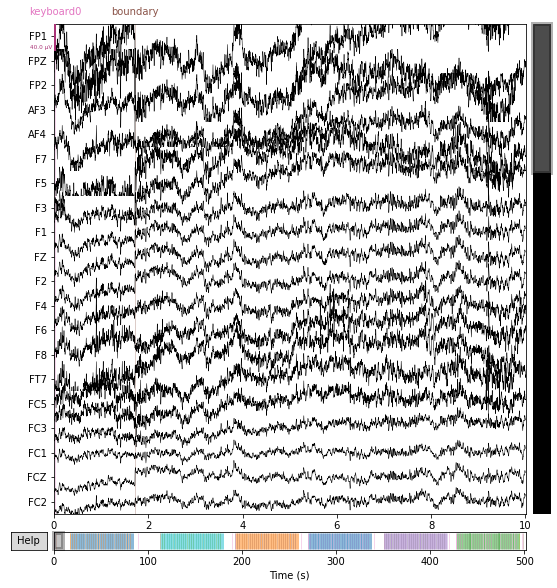

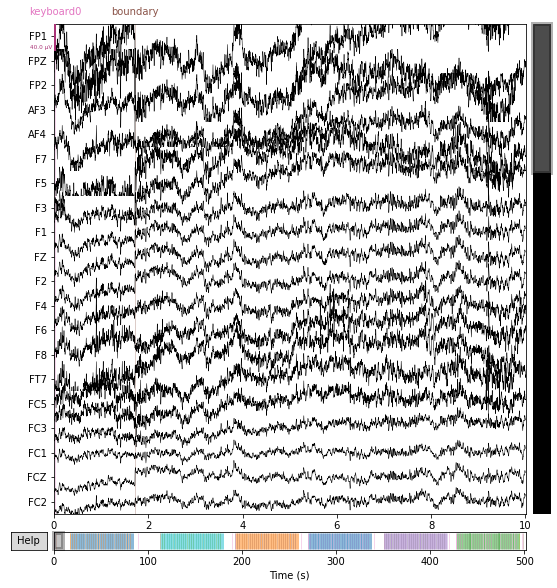

In [ ]:
raw=ica.apply(raw.copy(),exclude=ica.exclude)
raw.plot()

Loading the dataset

In [ ]:
all_file_train_closed_h=glob('D:\semester 8\EEG data set\data_eye_closed_train_h\*.set')
all_file_train_closed_p=glob('D:\semester 8\EEG data set\data_eye_closed_train_p\*.set')

In [ ]:
all_file_train_closed_h[0]
all_file_train_closed_p[0]
print(len(all_file_train_closed_h),len(all_file_train_closed_p))

263 94


In [ ]:
def read_data(file_path):
    data = mne.io.read_raw_eeglab(file_path,preload=True)
    data.set_eeg_reference()
    data.filter(l_freq=0.5,h_freq=50)
    data.crop(tmax=40)

    ica=mne.preprocessing.ICA(random_state=20)
    ica.fit(data.copy())
    data.set_channel_types({'HEOG': 'eog', 'VEOG': 'eog'})
    ica.exclude = []
# find which ICs match the ECG pattern
    eog_indices, eog_scores = ica.find_bads_eog(data,threshold=4)
#ecg_indices, ecg_scores = ica.find_bads_eog(raw,ch_name='HEOG',threshold=4)
    ica.exclude = eog_indices
    data=ica.apply(data.copy(),exclude=ica.exclude)
    #data.load_data()
    epochs=mne.make_fixed_length_epochs(data,duration=8,overlap=0)
    #array=epochs.get_data()
    return epochs

In [ ]:
sample_data=read_data('D:\semester 8 bachelor\data\sub-014\eeg\sub-014_task-Rest_run-01_eeg.set')

Reading D:\semester 8 bachelor\data\sub-014\eeg\sub-014_task-Rest_run-01_eeg.fdt
Reading 0 ... 250699  =      0.000 ...   501.398 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3301 samples (6.602 sec)



C:\Users\dell\AppData\Local\Temp\ipykernel_2132\1174294619.py:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(file_path,preload=True)


Fitting ICA to data using 67 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 66 components
Fitting ICA took 5.8s.
Using EOG channels: HEOG, VEOG
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transit

In [ ]:
#sample_data.plot()
s_d=sample_data.get_data()
print(len(s_d[0]))


Using data from preloaded Raw for 5 events and 4000 original time points ...
67


In [ ]:
sample_data.shape# epochs,channels,length of signal

(5, 67, 4000)

In [ ]:
%%capture
control_epochs_array_closed=[read_data(i) for i in all_file_train_closed_h]
patient_epochs_array_closed=[read_data(i) for i in all_file_train_closed_p]

KeyboardInterrupt: 

In [ ]:
%%capture
control_epochs_array_closed=[read_data(i) for i in all_file_train_closed_h]

NameError: name 'all_file_train_closed_h' is not defined

In [ ]:
%%capture
all_file_test_closed_h=glob('D:\semester 8\EEG data set\data_eye_closed_test_h\*.set')
all_file_test_closed_p=glob('D:\semester 8\EEG data set\data_eye_closed_test_p\*.set')
control_epochs_test_closed=[read_data(i) for i in all_file_test_closed_h]
patient_epochs_test_closed=[read_data(i) for i in all_file_test_closed_p]

In [ ]:
control_epochs_labels_closed=[len(i)*[0]for i in control_epochs_array_closed]
patient_epochs_labels_closed=[len(i)*[1]for i in patient_epochs_array_closed]
control_epochs_labels_test_c=[len(i)*[0]for i in control_epochs_test_closed]
patient_epochs_labels_test_c=[len(i)*[1]for i in patient_epochs_test_closed]
print(len(control_epochs_labels_closed),len(patient_epochs_labels_closed),len(control_epochs_labels_test_c),len(patient_epochs_labels_test_c))

263 94 47 20


In [ ]:
train_data_list=control_epochs_array_closed+patient_epochs_array_closed
train_label_list=control_epochs_labels_closed+patient_epochs_labels_closed
test_data_list=control_epochs_test_closed+patient_epochs_test_closed
test_label_list=control_epochs_labels_test_c+patient_epochs_labels_test_c

In [ ]:
len(test_data_list),len(train_data_list)
len(test_label_list),len(train_label_list)

(67, 357)

In [ ]:
train_data_list[0].shape

(2, 66, 4000)

In [ ]:
import numpy as np
data = np.loadtxt('D:\semester 8\data.txt')

In [ ]:
from scipy import signal
from scipy.integrate import simps
from scipy.signal import welch
from scipy.integrate import simps
import mne
band = np.asarray([4,8])
low, high = band
window_sec=None
sf=500
test=raw.pick_channels(['FP1'])
ppp=test.get_data()
    # Define window length
if window_sec is not None:
        nperseg = window_sec * sf
else:
        nperseg = (2 / low) * sf

    # Compute the modified periodogram (Welch)
freqs, psd = signal.welch(ppp, sf, nperseg=nperseg)
#print(psd)
#print(freqs)
    # Frequency resolution
freq_res = freqs[1] - freqs[0]
#print(freq_res)

    # Find closest indices of band in frequency vector
idx_band = np.logical_and(freqs >= low, freqs <= high)

print(len(psd[0]),len(idx_band))
    # Integral approximation of the spectrum using Simpson's rule.
bp = simps(psd[0][idx_band], dx=freq_res)
print(bp)



126 126
7.80213410476135e-11


Opening raw-browser...


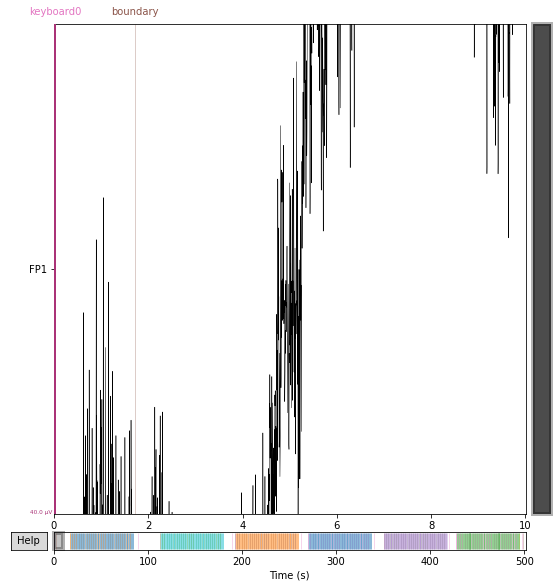

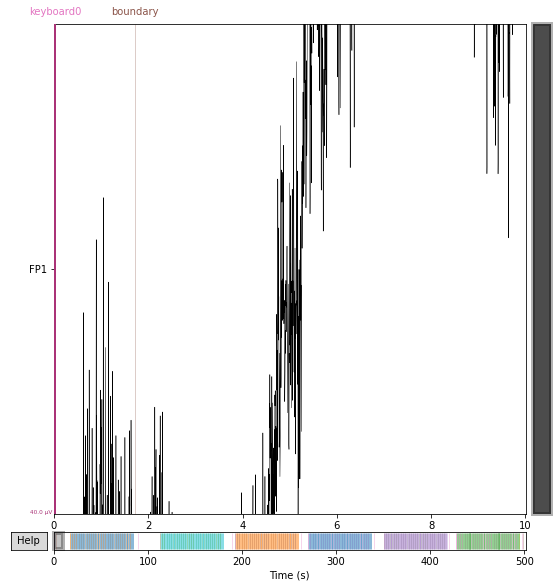

In [ ]:
test=raw.pick_channels(['FP1'])
test.plot()

[ 1.18584613e-20  4.66365928e-06  8.81324888e-06 ...  3.28148531e-05
  1.89760876e-05 -7.62329653e-21] [[ 1.18584613e-20  4.66365928e-06  8.81324888e-06 ...  3.28148531e-05
   1.89760876e-05 -7.62329653e-21]]
Opening raw-browser...


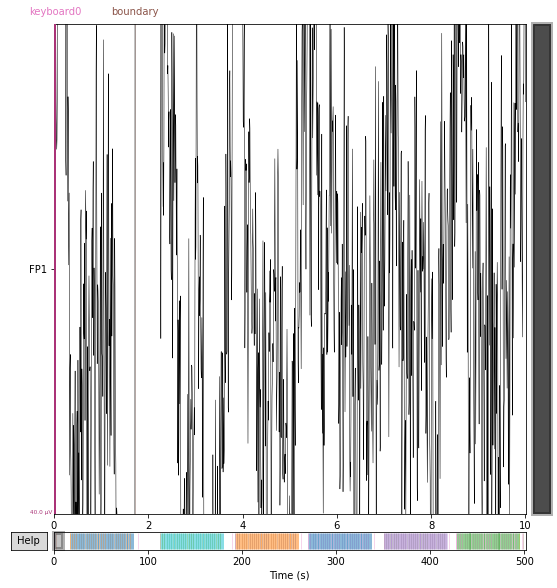

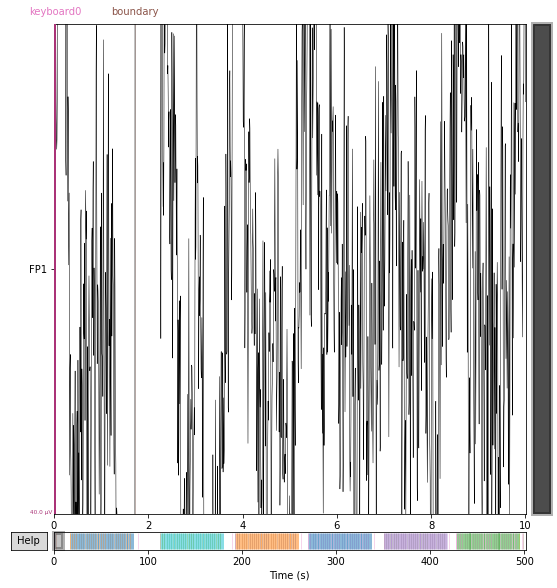

In [ ]:
raw.load_data()
print(test.get_data()[0],raw.get_data())
raw.plot()

In [ ]:
from scipy import signal
from scipy.integrate import simps
def compute_feature(data,low,high,samplerate):
    win = 4 * samplerate
    freq_features = []
    freqs, psd = signal.welch(data, samplerate, nperseg=win)
    freq_res = freqs[1] - freqs[0]

    idx = np.logical_and(freqs >= low, freqs <= high)
    print(idx,psd)
    power = simps(psd[idx], dx=freq_res)
    freq_features.append(power)

    return freq_features


In [ ]:
ppp=test.get_data()
print(ppp)

[[-0.00013781 -0.00012922 -0.00012493 ... -0.00021352 -0.00021944
  -0.00022878]]


In [ ]:
from scipy import signal
from scipy.integrate import simps

power_features = []
samplerate = 500
band_theta = [4, 8]
band_alpha = [9, 12]
band_beta = [13, 30]
band_gamma = [31, 45]
#for i in train_data_list:
#events=mne.events_from_annotations(test)
#pp=mne.make_fixed_length_epochs(test,10,overlap=0)
power_theta=bandpower(ppp,samplerate,band_theta,8)
#p=compute_feature(,4,8,500)
#print(len(p))


IndexError: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 2001

Text(0, 0.5, 'Mean band Amplitude')

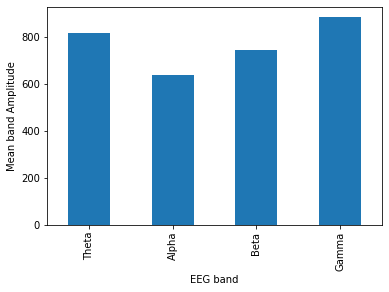

In [ ]:
import numpy as np

fs = 500                               # Sampling rate (512 Hz)
raw = np.random.uniform(0, 100, 1024)  # 2 sec of data b/w 0.0-100.0

# Get real amplitudes of FFT (only in postive frequencies)
fft_vals = np.absolute(np.fft.rfft(raw))

# Get frequencies for amplitudes in Hz
fft_freq = np.fft.rfftfreq(len(raw), 1.0/fs)

# Define EEG bands
eeg_bands = {
             'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)}

# Take the mean of the fft amplitude for each EEG band
eeg_band_fft = dict()
for band in eeg_bands:
    freq_ix = np.where((fft_freq >= eeg_bands[band][0]) &
                       (fft_freq <= eeg_bands[band][1]))[0]
    eeg_band_fft[band] = np.mean(fft_vals[freq_ix])

# Plot the data (using pandas here cause it's easy)
import pandas as pd
df = pd.DataFrame(columns=['band', 'val'])
df['band'] = eeg_bands.keys()
df['val'] = [eeg_band_fft[band] for band in eeg_bands]
ax = df.plot.bar(x='band', y='val', legend=False)
ax.set_xlabel("EEG band")
ax.set_ylabel("Mean band Amplitude")

In [ ]:
events=mne.events_from_annotations(raw)
try22=mne.time_frequency.stft(events[0],2048)
print(try22)


Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Number of frequencies: 1025
Number of time steps: 1
[[[ 5.52427173e-01+0.00000000e+00j]
  [-2.03377765e-03-5.52420933e-01j]
  [-5.52402215e-01+4.06747872e-03j]
  ...
  [-5.52402215e-01-4.06747872e-03j]
  [-2.03377765e-03+5.52420933e-01j]
  [ 5.52427173e-01+0.00000000e+00j]]

 [[ 1.93128540e+01+0.00000000e+00j]
  [-1.89819247e-03-1.93128481e+01j]
  [-1.93128307e+01+3.79631347e-03j]
  ...
  [-1.93128307e+01-3.79631347e-03j]
  [-1.89819247e-03+1.93128481e+01j]
  [ 1.93128540e+01+0.00000000e+00j]]

 [[ 1.90963025e+02+0.00000000e+00j]
  [-2.03377765e-03-1.90963019e+02j]
  [-1.90963000e+02+4.06747872e-03j]
  ...
  [-1.90963000e+02-4.06747872e-03j]
  [-2.03377765e-03+1.90963019e+02j]
  [ 1.90963025e+02+0.00000000e+00j]]

 ...

 [[ 5.46752641e+03+0.00000000e+00j]
  [-1.08468141e-03-5.46752641e+03j]
  [-5.46752640e+03+2.16932198e-03j]
  ...
  [-5.46752640e+03-2.169321

In [ ]:
def bandpower(data, sf, band, window_sec=None, relative=False):
    from scipy.signal import welch
    from scipy.integrate import simps
    band = np.asarray(band)
    low, high = band

    # Define window length
    if window_sec is not None:
        nperseg = window_sec * sf
    else:
        nperseg = (2 / low) * sf

    # Compute the modified periodogram (Welch)
    freqs, psd = welch(data, sf, nperseg=nperseg)

    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Find closest indices of band in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)

    # Integral approximation of the spectrum using Simpson's rule.
    bp = simps(psd[idx_band], dx=freq_res)

    if relative:
        bp /= simps(psd, dx=freq_res)
    return bp

In [ ]:

# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
# define data
data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to csv file
savetxt('data.csv', data, delimiter=',')

In [ ]:

# load numpy array from csv file
from numpy import loadtxt
# load array
data = loadtxt('data.csv', delimiter=',')
# print the array
print(data)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [ ]:
print(data[5])

5.0
